In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# getting just 2020 data
data = df[(df['year'] == 2020) | (df['year'] == 2014) | (df['year'] == 2015) | (df['year'] == 2016)
          | (df['year'] == 2017) | (df['year'] == 2018) | (df['year'] == 2019)]




In [4]:
data.reset_index(inplace=True)
del data['index']
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.887,['Frank Sinatra'],0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.9040,-17.796,1,The September Of My Years - Live At The Sands ...,27,2018-05-04,0.0623,117.153,0.239,2018
1,0.938,['Frank Sinatra'],0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.6830,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,2018-05-04,0.0576,82.332,0.160,2018
2,0.881,['Joni Mitchell'],0.644,313093,0.212,0,55qyghODi24yaDgKBI6lx0,0.000022,11,0.7980,-14.118,1,"The Circle Game - Live at The 2nd Fret, Philad...",19,2020-10-30,0.0347,117.072,0.441,2020
3,0.955,['Joni Mitchell'],0.627,295093,0.184,0,00xemFYjQNRpOlPhVaLAHa,0.000162,1,0.0986,-15.533,1,"Urge For Going - Live at The 2nd Fret, Philade...",19,2020-10-30,0.0450,115.864,0.299,2020
4,0.888,['Joni Mitchell'],0.581,183440,0.331,0,2lm5FQJRHvc3rUN5YHpEWj,0.000015,6,0.1470,-14.087,1,What's The Story Mr. Blue - Live at The 2nd Fr...,19,2020-10-30,0.2430,88.303,0.642,2020


In [5]:
data['year'].unique()

array([2018, 2020, 2019, 2017, 2016, 2015, 2014])

In [33]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=4, 
                                   n_jobs=4))])

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [34]:
data['cluster_label'].unique()

array([1, 0, 2, 3], dtype=int32)

In [35]:
data.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster_label
0,0.887,['Frank Sinatra'],0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.904,-17.796,1,The September Of My Years - Live At The Sands ...,27,2018-05-04,0.0623,117.153,0.239,2018,1
1,0.938,['Frank Sinatra'],0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.683,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,2018-05-04,0.0576,82.332,0.160,2018,1


In [36]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

## Finding the Optimal Number of Clusters Using the Silhouette Method

It measures how similar a point is to its own cluster compared to other clusters.

In [10]:
sil = []
kmax = 20

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

In [11]:
k = [k for k in range(2,21)]
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

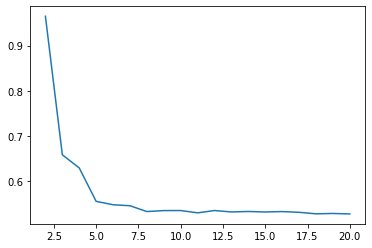

In [12]:
plt.plot(k,sil)